# 1. Algorithm's Basics

- **Created by Dr. Ajay**
- **Created on Dec 18, 2021**
- **Updated on May 18, 2025**

## Algorithms
In mathematics and computer science, an algorithm is a finite sequence of well-defined, computer-implementable instructions, typically to solve a class of problems or to perform a computation <a href="#link_one">[1]</a>.

In [2]:
# Load the Python libraries
import math
import random
import timeit
import numpy as np
from scipy import stats as sci
import statistics as stats
from itertools import cycle

In [3]:
# Load plotting libraries
import matplotlib.pyplot as plt

## 1.1. Greatest Common Divisor (GCD)

The greatest common divisor (GCD) of two or more integers, which are not all zero, is the largest positive integer that divides each of the integers. For two integers $ x, y $, the greatest common divisor of $x$ and $y$ is denoted $ gcd(x,y) $ <a href="#link_two">[2]</a>. For example, the GCD of 8 and 12 is 4, that is, $ gcd(8,12)=4 $.

In [7]:
# Example values
m = 12000000
n = 76000000

### 1.1.1. Simple approach

In [23]:
def LCM(a, b):
    g = max(a, b)
    s = min(a, b)
    for i in range(g, a * b + 1, g):
        if i % s == 0:
            return i

def gcd_simple(a, b):
    c = a * b
    d = LCM(a, b)
    sol = c // d
    return sol

print(gcd_simple(8, 12))


4


In [27]:
import time

m = 12
n = 18

start_time = time.time()
gcd_simple(m, n)
end_time = time.time()

elapsed_ms = (end_time - start_time) * 1000
print(elapsed_ms)


0.12683868408203125


### 1.1.2. Enhanced approach

In [26]:
# Function that returns the GCD of two values (euclidean algorithm)
def gcd_euclidean(m, n):
    m = min(m, n)
    n = max(m, n)

    while m > 0:
        t = m
        m = n % m
        n = t

    return n
    gcd_euclidean(4,12)

In [47]:
# Compute the elapsed time in ms for computing gdc with the help of gcd_euclidean()function

import time

m = 4
n = 12

start_time = time.time()
gcd_simple(m, n)
end_time = time.time()

elapsed_ms = (end_time - start_time)
print(elapsed_ms)


7.295608520507812e-05


## 1.2. Fibonacci Serie

In mathematics, the Fibonacci numbers, commonly denoted $ F_n $, form a sequence, called the Fibonacci sequence, such that each number is the sum of the two preceding ones, starting from 0 and 1. That is <a href="#link_three">[3]</a>,

$ \quad F_{0}=0,\quad F_{1}=1, $  
and  
$ \quad F_{n}=F_{n-1}+F_{n-2} $  
for n > 1.

The beginning of the sequence is thus:  
$ \quad 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, ... $

In [29]:
# Example value
n = 35

### 1.2.1. Recursive algorithm

In [31]:
# Function that returns the n-fibonacci value (recursive algorithm)
def fibo_rec(n):
    if n < 2:
        return n
    else:
        return fibo_rec(n - 1) + fibo_rec(n - 2)
fibo_rec(35)

9227465

In [37]:
#compute the time in ms for above cell.
import time
st_time=time.time()
fibo_rec(35)
en_time=time.time()
elapsed=en_time-st_time
print(elapsed)


2.115565061569214


### 1.2.2. Iterative algorithm

In [43]:
# Function that returns the n-fibonacci value (iterative algorithm)
def fibo_iter(n):
    i, j = 1, 0

    for k in range(n):
        j = i + j
        i = j - i

    return j
fibo_iter(4)

3

In [42]:
#compute time in ms for iteratve alforithm.
import time

start = time.time()
print(fibo_iter(4))
end = time.time()

elapsed = end - start
print(elapsed)

3
0.0002713203430175781


### 1.2.3. Approximation approach
With the De Moivre's formula:

$$ f_{n} = {\frac{1}{\sqrt{5}}}{[\phi^n -(-\phi)^{-n}]} \tag{1}, $$
$$ \phi = (1 + \sqrt{5})\,/\,2 $$

In [44]:
# Function that returns the n-fibonacci value (De Moivre equation)
def fibo_de_moivre(n):
    golden_ratio = (1 + 5**(1/2)) / 2
    f = (golden_ratio**n - (-golden_ratio)**(-n)) / 5**(1/2)
    return int(f)
fibo_de_moivre(5)

5

In [46]:
#compute time in ms of above cell (de moivre equation)
import time

start = time.time()
print(fibo_de_moivre(5))
end = time.time()

elapsed = end - start
print(elapsed)


5
0.002129077911376953


## 1.3. Integer Factorization

In number theory, integer factorization is the decomposition of a composite number into a product of smaller integers. If these factors are further restricted to prime numbers, the process is called prime factorization <a href="#link_four">[4]</a>.

In [ ]:
# Example values
a, b = 104723, 104729
n = a * b
n

In [52]:
# Function that returns the factorization of an integer (ascending approach)
def fact_int(n):
    nn = n**(1/2)
    m = 2

    while m < nn:
        if n % m == 0:
            return (m, n // m)
        m += 1

    return (1, n)
fact_int(8)

(2, 4)

In [49]:
# compute time for above cell
import time

start = time.time()
print(fact_int(8))
end = time.time()
elapsed = end - start
print(elapsed)

(2, 4)
0.00019550323486328125


In [53]:
# Function that returns the factorization of an integer (descending approach)
def fact_int_2(n):
    nn = n**(1/2)
    m = int(nn)

    while m > 1:
        if n % m == 0:
            return (m, n // m)
        m -= 1

    return (1, n)
fact_int(6)

(2, 3)

In [54]:
#compute time for above cell
import time
start = time.time()
print(fact_int(8))
end = time.time()
elapsed = end - start
print(elapsed)

(2, 4)
0.0010504722595214844


## 1.4. Tower of Hanoi

The Tower of Hanoi is a mathematical game or puzzle. It consists of three rods and a number of disks of different sizes, which can slide onto any rod. The puzzle starts with the disks in a neat stack in ascending order of size on one rod, the smallest at the top, thus making a conical shape <a href="#link_five">[5]</a>.

In [ ]:
# Disk number between 2 and 64 (not recommended)
n_disks = 5

### 1.4.1. The recursive and classic algorithm

In [57]:
# Move n disk from source to destination
def hanoi_rec(n, source, aux, target):
    if n > 0:
        hanoi_rec(n - 1, source, target, aux)
        print('Move disk', n, 'from:', source, 'to:', target)
        hanoi_rec(n - 1, aux, source, target)
hanoi_rec(3,1,2,3)

Move disk 1 from: 1 to: 3
Move disk 2 from: 1 to: 2
Move disk 1 from: 3 to: 2
Move disk 3 from: 1 to: 3
Move disk 1 from: 2 to: 1
Move disk 2 from: 2 to: 3
Move disk 1 from: 1 to: 3


In [63]:
start_time = timeit.default_timer()
print('>> number of movements:', (2**3 - 1))
hanoi_rec(3, 1, 2, 3)
end_time = timeit.default_timer()
print('>> elapsed time', (end_time - start_time))

>> number of movements: 7
Move disk 1 from: 1 to: 3
Move disk 2 from: 1 to: 2
Move disk 1 from: 3 to: 2
Move disk 3 from: 1 to: 3
Move disk 1 from: 2 to: 1
Move disk 2 from: 2 to: 3
Move disk 1 from: 1 to: 3
>> elapsed time 0.0004558469995572523


### 1.4.2. Iterative algorithm

In [64]:
# Move n disk from source to destination
def hanoi_iter(n, source, aux, target):
    n_movements = 2**n_disks - 1
    print('>> number of movements:', n_movements)

    tw_src = []
    for i in range(n_disks, 0, -1):
        tw_src.append(i)

    labels = [source, aux, target]
    towers = [tw_src, [], []]
    indexes = cycle([0, 1, 2] if n % 2 == 0 else [0, 2, 1])
    temp = next(indexes)
    disk = 0

    for i in range(1, n_movements + 1):
        if i % 2 == 1:
            disk = 1
            s, t = temp, next(indexes)
            temp = t
            towers[t].append(towers[s].pop())
            print('Move disk', disk, 'from:', labels[s], 'to:', labels[t])
        else:
            i_t2, i_t3 = [i for i in range(3) if i != temp]
            v_t2 = towers[i_t2][len(towers[i_t2]) - 1] if len(towers[i_t2]) else math.inf
            v_t3 = towers[i_t3][len(towers[i_t3]) - 1] if len(towers[i_t3]) else math.inf

            if v_t2 < v_t3:
                s, t = i_t2, i_t3
            else:
                s, t = i_t3, i_t2

            disk = towers[s].pop()
            towers[t].append(disk)
            print('Move disk', disk, 'from:', labels[s], 'to:', labels[t])
hanoi_rec(3,1,2,3)

Move disk 1 from: 1 to: 3
Move disk 2 from: 1 to: 2
Move disk 1 from: 3 to: 2
Move disk 3 from: 1 to: 3
Move disk 1 from: 2 to: 1
Move disk 2 from: 2 to: 3
Move disk 1 from: 1 to: 3


In [65]:
start_time = timeit.default_timer()
print('>> number of movements:', (2**3 - 1))
hanoi_rec(3, 1, 2, 3)
end_time = timeit.default_timer()
print('>> elapsed time', (end_time - start_time))

>> number of movements: 7
Move disk 1 from: 1 to: 3
Move disk 2 from: 1 to: 2
Move disk 1 from: 3 to: 2
Move disk 3 from: 1 to: 3
Move disk 1 from: 2 to: 1
Move disk 2 from: 2 to: 3
Move disk 1 from: 1 to: 3
>> elapsed time 0.0006877119999444403


## 1.5. Sorting Algorithm

**Bubble sort**, sometimes referred to as sinking sort, is a simple sorting algorithm that repeatedly steps through the list, compares adjacent elements and swaps them if they are in the wrong order. The pass through the list is repeated until the list is sorted. The algorithm, which is a comparison sort, is named for the way smaller or larger elements "bubble" to the top of the list <a href="#link_six">[6]</a>.

In [75]:
# write a function named as bubble_sort for Bubble-sort:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n - 1):
        swapped = False
        for j in range(n - 1 - i):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr
# arr=[9,6,10,5]
# bubble_sort(arr)


With time complexity of $ \Theta(n^2) $ and space complexity of $ \Theta(n) $.

In [74]:
# Example values
n = 100
raw_data = []
for i in range(n):
    raw_data.append(int(random.random() * n))
print(raw_data)

[41, 98, 3, 76, 14, 89, 99, 64, 75, 47, 15, 72, 29, 66, 50, 9, 86, 87, 49, 75, 85, 10, 92, 38, 86, 93, 1, 99, 3, 50, 66, 93, 52, 52, 25, 60, 7, 83, 73, 37, 17, 68, 76, 74, 55, 11, 93, 6, 40, 79, 18, 35, 48, 9, 26, 77, 77, 18, 6, 10, 37, 22, 60, 2, 59, 94, 32, 15, 33, 80, 6, 72, 74, 37, 62, 86, 6, 88, 87, 52, 84, 81, 15, 70, 2, 60, 21, 45, 98, 75, 35, 81, 66, 88, 65, 28, 24, 59, 29, 86]


In [76]:
# Sorting data
sorted_data = bubble_sort(raw_data.copy())
print(sorted_data)

[1, 2, 2, 3, 3, 6, 6, 6, 6, 7, 9, 9, 10, 10, 11, 14, 15, 15, 15, 17, 18, 18, 21, 22, 24, 25, 26, 28, 29, 29, 32, 33, 35, 35, 37, 37, 37, 38, 40, 41, 45, 47, 48, 49, 50, 50, 52, 52, 52, 55, 59, 59, 60, 60, 60, 62, 64, 65, 66, 66, 66, 68, 70, 72, 72, 73, 74, 74, 75, 75, 75, 76, 76, 77, 77, 79, 80, 81, 81, 83, 84, 85, 86, 86, 86, 86, 87, 87, 88, 88, 89, 92, 93, 93, 93, 94, 98, 98, 99, 99]


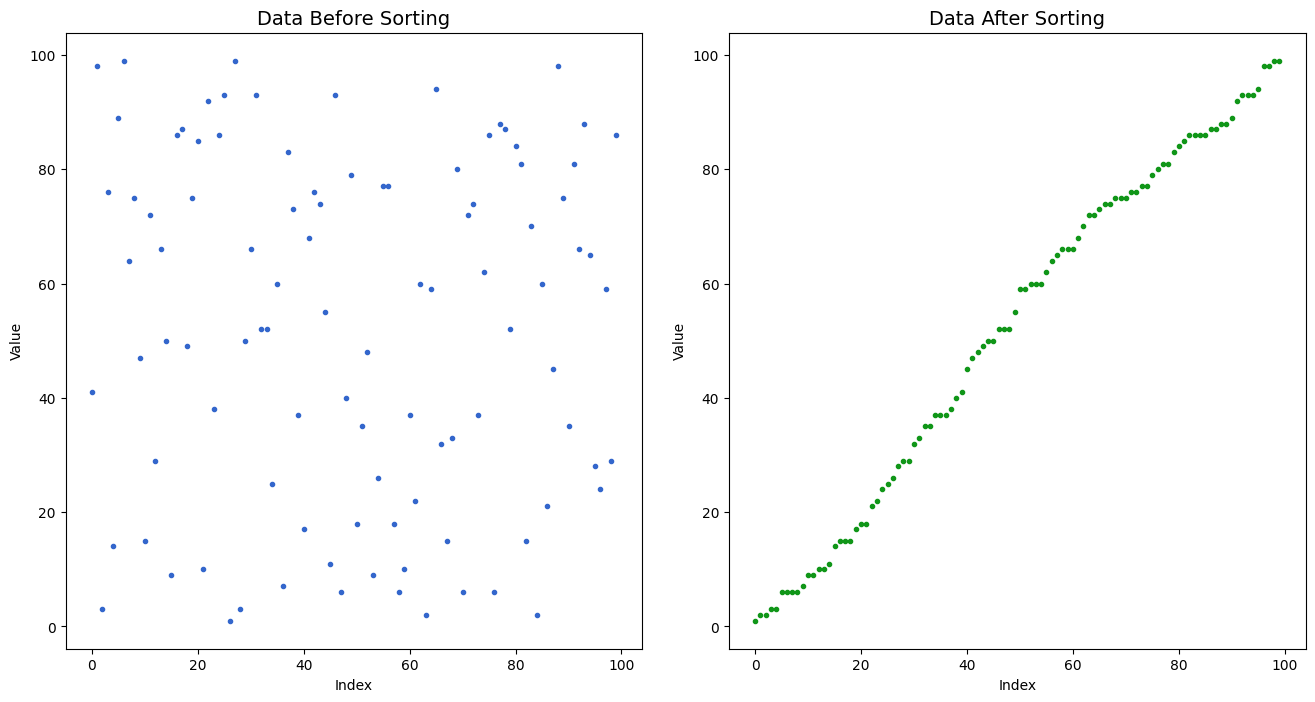

In [77]:
# Plotting
fig = plt.figure(figsize = (16, 8))
fig.subplots_adjust(hspace = 0.15, wspace = 0.15)

# Plotting results before sorting
plt.subplot(1, 2, 1)
plt.plot(raw_data, linewidth=0, marker="o", markersize=3, color="#3366cc")
plt.title("Data Before Sorting", fontsize = 14)
plt.ylabel('Value')
plt.xlabel('Index')

# Plotting results after sorting
plt.subplot(1, 2, 2)
plt.plot(sorted_data, linewidth=0, marker="o", markersize=3, color="#109618")
plt.title("Data After Sorting", fontsize = 14)
plt.ylabel('Value')
plt.xlabel('Index')
plt.show()

## References

<a name='link_one' href='https://en.wikipedia.org/wiki/Algorithm' target='_blank' >[1]</a> Wikipedia - Algorithm.  
<a name='link_two' href='https://en.wikipedia.org/wiki/Greatest_common_divisor' target='_blank' >[2]</a> Wikipedia - Greatest common divisor.  
<a name='link_three' href='https://en.wikipedia.org/wiki/Tower_of_Hanoi' target='_blank' >[3]</a> Wikipedia - Tower of Hanoi.  
<a name='link_four' href='https://en.wikipedia.org/wiki/Integer_factorization' target='_blank' >[4]</a> Wikipedia - Integer factorization.  
<a name='link_five' href='https://en.wikipedia.org/wiki/Bubble_sort' target='_blank' >[5]</a> Wikipedia - Bubble sort.  
